##### Aldo Daniel Villaseñor Fierro
##### A01637907

#### Suponga que la porosidad al helio (en porcentaje) de muestras de carbón, tomadas de cualquier veta en particular, está normalmente distribuida con una desviación estándar verdadera de 0.75. Se sabe que 10 años atrás la porosidad media de helio en la veta era de 5.3 y se tiene interés en saber si actualmente ha disminuido. Se toma una muestra al azar de 20 especímenes y su promedio resulta de 4.85. 


##### a) Haga una estimación por intervalo con una confianza del 97% para el promedio de porosidad para evaluar si ha disminuido. 

In [37]:
import scipy.stats as stats
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Datos del problema
media_muestra1 = 4.85
desviacion_estandar_verdadera = 0.75
tamano_muestra1 = 20
nivel_confianza = 0.97
valor_critico = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)  # Valor Z correspondiente

# Calculando el intervalo de confianza para la primera muestra
error_estandar = desviacion_estandar_verdadera / math.sqrt(tamano_muestra1)
intervalo_confianza1 = (media_muestra1 - valor_critico * error_estandar, media_muestra1 + valor_critico * error_estandar)

print("Intervalo de confianza para la primera muestra:", intervalo_confianza1)



Intervalo de confianza para la primera muestra: (4.486064779880205, 5.213935220119795)


##### b) Se toma otra muestra de tamaño 16. El promedio de la muestra fue de 4.56. Calcule el intervalo de confianza al 97% de confianza

In [39]:
# Datos de la segunda muestra
media_muestra2 = 4.56
tamano_muestra2 = 16

# Calculando el intervalo de confianza para la segunda muestra
error_estandar2 = desviacion_estandar_verdadera / math.sqrt(tamano_muestra2)
intervalo_confianza2 = (media_muestra2 - valor_critico * error_estandar2, media_muestra2 + valor_critico * error_estandar2)

print("Intervalo de confianza para la segunda muestra:", intervalo_confianza2)

Intervalo de confianza para la segunda muestra: (4.153108054202894, 4.966891945797105)


##### c) ¿Podemos afirmar que la porosidad del helio ha disminuido? El misterioso Helio


In [40]:
# Comparación de intervalos para evaluar si la porosidad ha disminuido
if intervalo_confianza1[0] > intervalo_confianza2[1] or intervalo_confianza2[0] > intervalo_confianza1[1]:
    print("Podemos afirmar que la porosidad del helio ha disminuido.")
else:
    print("No podemos afirmar que la porosidad del helio ha disminuido.")

No podemos afirmar que la porosidad del helio ha disminuido.


#### Suponga que la porosidad al helio (en porcentaje) de muestras de carbón, tomadas de cualquier veta en particular, está normalmente distribuida con una desviación estándar verdadera de 0.75.

##### a) ¿Qué tan grande tiene que ser el tamaño de la muestra si se desea que el ancho del intervalo con un 95% de confianza no sobrepase de 0.4?

In [41]:
# Datos del problema
desviacion_estandar_verdadera = 0.75

# a) Determinar el tamaño de muestra para un ancho de intervalo de 0.4 con 95% de confianza
nivel_confianza_a = 0.95
ancho_deseado_a = 0.4/2
valor_critico_a = stats.norm.ppf(1 - (1 - nivel_confianza_a) / 2)

# Solución para a)
tamanio_muestra_a = math.ceil((valor_critico_a * desviacion_estandar_verdadera / ancho_deseado_a) ** 2)
print("El tamaño de muestra necesario para el ancho de intervalo de 0.4 con 95% de confianza:", tamanio_muestra_a)

El tamaño de muestra necesario para el ancho de intervalo de 0.4 con 95% de confianza: 55


##### b) ¿Qué tamaño de muestra necesita para estimar la porosidad promedio verdadera dentro de 0.2 unidades alrededor de la media muestral con una confianza de 99%?

In [42]:
# b) Determinar el tamaño de muestra para un ancho de intervalo de 0.2 con 99% de confianza
nivel_confianza_b = 0.99
ancho_deseado_b = 0.2
valor_critico_b = stats.norm.ppf(1 - (1 - nivel_confianza_b) / 2)

# Solución para b)
tamanio_muestra_b = math.ceil((valor_critico_b * desviacion_estandar_verdadera / ancho_deseado_b) ** 2)
print("El tamaño de muestra necesario para el ancho de intervalo de 0.2 con 99% de confianza:", tamanio_muestra_b)

El tamaño de muestra necesario para el ancho de intervalo de 0.2 con 99% de confianza: 94


#### 3. Grafica los intervalos. En un gráfico la intensidad de pulso con y sin marcapasos y en otro gráfico el periodo entre pulso con y sin marcapasos. Interpreta el resultado.

In [43]:
df=pd.read_csv('El marcapasos.csv',encoding = 'unicode_escape', engine ='python')
df_con = df[df['Marcapasos']=='Con MP']
df_sin = df[df['Marcapasos']=='Sin MP']
df

,Periodo entre pulsos,Intensidad de pulso,Marcapasos
0,1.20,0.131,Sin MP
1,0.90,0.303,Sin MP
2,0.90,0.297,Sin MP
3,0.80,0.416,Sin MP
4,0.70,0.585,Sin MP
...,...,...,...
97,0.81,0.298,Con MP
98,0.93,0.143,Con MP
99,1.04,0.019,Con MP
100,1.06,0.006,Con MP


#### Intervalo de confianza al 95% para media de Periodo entre pulsos e Intensidad de pulso para grupo sin marcapasos

In [44]:
# Intervalos de confianza para la media
nivel_confianza = 0.95
valor_critico = stats.t.ppf(1 - (1 - nivel_confianza) / 2, len(df_sin) - 1)

In [45]:
intervalo_conf=[(df_sin['Periodo entre pulsos'].mean()-valor_critico*(df_sin['Periodo entre pulsos'].std())),
                (df_sin['Periodo entre pulsos'].mean()+valor_critico*(df_sin['Periodo entre pulsos'].std()))]#/np.sqrt(len(df_sin)))

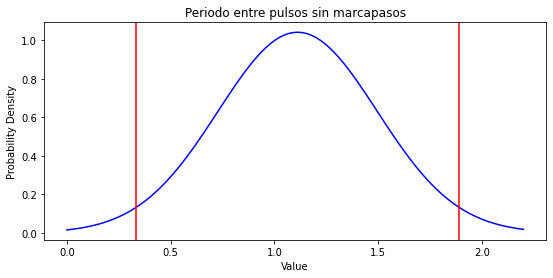

In [46]:
x = np.linspace(0,2.2,100)
inter= intervalo_conf[0]
inter_inf= intervalo_conf[1]
serie=df_sin['Periodo entre pulsos']
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(9, 4))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Periodo entre pulsos sin marcapasos')
plt.axvline(x=inter, color="red")
plt.axvline(x=inter_inf, color="red")
plt.show()

In [47]:
intervalo_conf=[(df_sin['Intensidad de pulso'].mean()-valor_critico*(df_sin['Intensidad de pulso'].std())),
                (df_sin['Intensidad de pulso'].mean()+valor_critico*(df_sin['Intensidad de pulso'].std()))]#/np.sqrt(len(df_sin)))

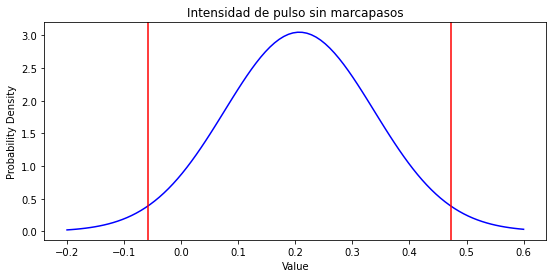

In [48]:
x = np.linspace(-0.2,0.6,100)
inter= intervalo_conf[0]
inter_inf= intervalo_conf[1]
serie=df_sin['Intensidad de pulso']
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(9, 4))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Intensidad de pulso sin marcapasos')
plt.axvline(x=inter, color="red")
plt.axvline(x=inter_inf, color="red")
plt.show()

#### Intervalo de confianza al 95% para media de Periodo entre pulsos e Intensidad de pulso para grupo con marcapasos

In [49]:
intervalo_conf=[(df_con['Periodo entre pulsos'].mean()-valor_critico*(df_con['Periodo entre pulsos'].std())),
                (df_con['Periodo entre pulsos'].mean()+valor_critico*(df_con['Periodo entre pulsos'].std()))]#/np.sqrt(len(df_sin)))

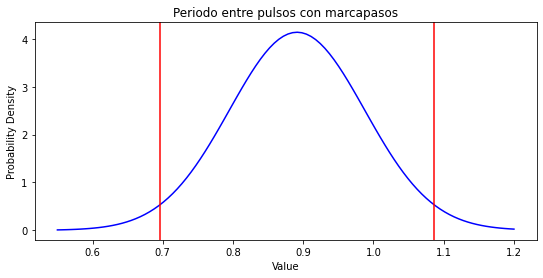

In [50]:
x = np.linspace(0.55,1.2,100)
inter= intervalo_conf[0]
inter_inf= intervalo_conf[1]
serie=df_con['Periodo entre pulsos']
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(9, 4))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Periodo entre pulsos con marcapasos')
plt.axvline(x=inter, color="red")
plt.axvline(x=inter_inf, color="red")
plt.show()

In [51]:
intervalo_conf=[(df_con['Intensidad de pulso'].mean()-valor_critico*(df_con['Intensidad de pulso'].std())),
                (df_con['Intensidad de pulso'].mean()+valor_critico*(df_con['Intensidad de pulso'].std()))]#/np.sqrt(len(df_sin)))

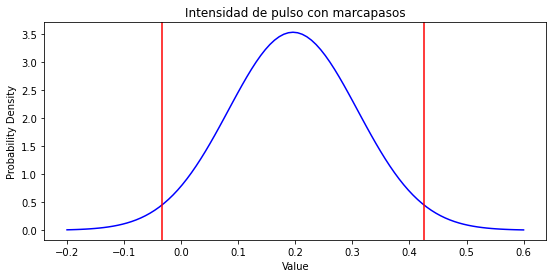

In [53]:
x = np.linspace(-0.2,0.6,100)
inter= intervalo_conf[0]
inter_inf= intervalo_conf[1]
serie=df_con['Intensidad de pulso']
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(9, 4))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Intensidad de pulso con marcapasos')
plt.axvline(x=inter, color="red")
plt.axvline(x=inter_inf, color="red")
plt.show()